# ComCam / WFS : analyze why stars are failing at the WFS stage .... 

In [1]:
import os
from astropy.table import Table
import numpy as np

# IMPORT CUSTOM FUNCTIONS 
import sys
sys.path.append('../analysis_tools/')
from calcMetrics import calcMetrics
import analysisTools as at 

# IMPORT LSST MODULES 
from lsst.ts.wep.ParamReader import ParamReader
from lsst.ts.wep.Utility import FilterType

from lsst.ts.ofc.Utility import InstName
from lsst.ts.ofc.ctrlIntf.OFCCalculationFactory import OFCCalculationFactory

from lsst.ts.phosim.SkySim import SkySim
from lsst.ts.phosim.OpdMetrology import OpdMetrology
from lsst.ts.phosim.Utility import getAoclcOutputPath, getConfigDir

# IMPORT PLOTTING MODULES
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [2]:
# setup the location of analysis files ... 
baseDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_arrow'
expDir = 'singleArrow'

In [3]:
data_dir = os.path.join(baseDir, topDir,expDir)
image = at.readPostISRImage(data_dir, focalType = 'extra', raft = 'R22', detector = 'S21',)
centroid, centFlag = at.readCentroidInfo(data_dir, focalType='extra', raft='R22',detector='S21')

data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R22', 'detectorName': 'S21', 'detector': 97}
Done

Reading centroid files from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/iter0/img/extra
The following files are available:
centroid_lsst_e_9006001_f1_R22_S11_E000.txt
centroid_lsst_e_9006001_f1_R22_S01_E000.txt
centroid_lsst_e_9006001_f1_R22_S20_E000.txt
centroid_lsst_e_9006001_f1_R22_S00_E000.txt
centroid_lsst_e_9006001_f1_R22_S12_E000.txt
centroid_lsst_e_9006001_f1_R22_S22_E000.txt
centroid_lsst_e_9006001_f1_R22_S02_E000.txt
centroid_lsst_e_9006001_f1_R22_S10_E000.txt
centroid_lsst_e_9006001_f1_R22_S21_E000.txt
Using centroid_lsst_e_9006001_f1_R22_S21_E000.txt 


In [4]:
%matplotlib inline
import imp
imp.reload(at)

# Note - postage stamp files are made in 


#   While the postage stamps are saved in 
#     WepController.py, getDonutMap(), 
 
#     the catalog is saved at the next stage, when 
#     WepController.py, calcWfErr(), 
#     calculates the wavefront error based on the donut map 

#     So if there is an error in that stage, the catalog is 
#     not made.
    
    
    
# 1 ) modify WepController.py, so that the postage stamp catalog is made regardless 
# of whether calcWfErr() works or not ... 

# getDonutMap()  and calcWfError() are called by WEPCalculation.py   , _calcWfErr()  
    
postage, postFlag =  at.readPostageStars(data_dir)


[Errno 2] No such file or directory: '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/postagedonutStarsExtraIntra.txt'


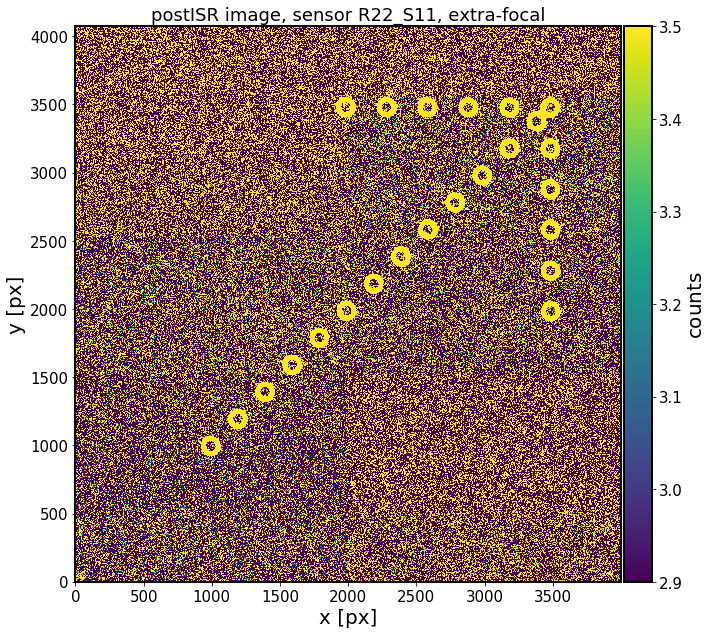

In [5]:
import imp
imp.reload(at)
at.plotImage(image,ax=None, log=False, sensor='R22_S11', focalType='extra',
          postage=postage,postFlag=postFlag, centroid=centFlag, 
          starMarker='redCross',starMarkerArgs=None,
          centMarkerArgs = None,centMarker='redCross',plotArgs={'vmin':2.9, 'vmax':3.5})

Using postage images from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/postage
Searching in /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/postage directory

Available postage stamp images for sensor R22_S21: 

Looking for files that start with "extra_singleSciImg" and contain "R22_S21"...

Found 1 singleSciImg postage stamp images 
['extra_singleSciImg_sensor-R22_S21_star-0_id-120_posX-0_posY-0.txt']

Looking for files that start with "extra_imgDeblend_full" and contain "R22_S21"...

Found 1 imgDeblend_full postage stamp images 
['extra_imgDeblend_full_sensor-R22_S21_star-0_id-120_posX-0_posY-0.txt']

Looking for files that start with "extra_imgDeblend_resized" and contain "R22_S21"...

Found 1 imgDeblend_resized postage stamp images 
['extra_imgDeblend_resized_sensor-R22_S21_star-0_id-120_posX-0_posY-0.txt']
Only found 1 
Loading extra_singleSciImg_sensor-R22_S21_star-0_id-

../analysis_tools/analysisTools.py:412: UserWarning: loadtxt: Empty input file: "/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrow/postage/extra_imgDeblend_resized_sensor-R22_S21_star-0_id-120_posX-0_posY-0.txt"
  image = np.loadtxt(os.path.join(postage_dir,fname))


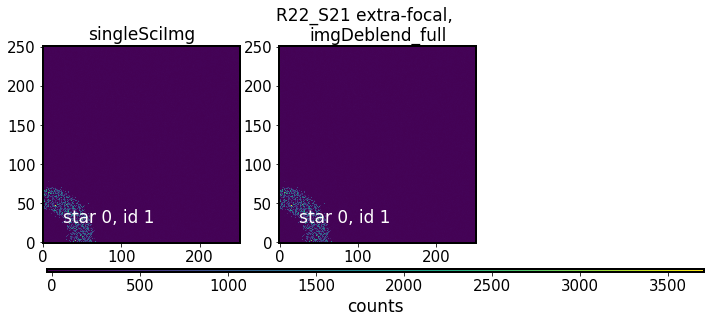

In [58]:
import imp
imp.reload(at)
sensor='R22_S21'; focalType='extra';
at.plotPostageStamps(data_dir, sensor=sensor, focalType=focalType, Nstars=2)

In [59]:
# setup the location of analysis files ... 
baseDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_wfs'
expDir = 'arrowStars'

data_dir = os.path.join(baseDir, topDir,expDir)
focalType = 'extra'
raft = 'R04'
detector = 'S20'
import imp
imp.reload(at)
image = at.readPostISRImage(data_dir, focalType=focalType, 
                           raft=raft, detector=detector, )

data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R04', 'detectorName': 'S20', 'detector': 204}
Done



Reading centroid files from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/iter0/img/extra
The following files are available:
centroid_lsst_e_9006001_f1_R44_S00_C0_E000.txt
centroid_lsst_e_9006001_f1_R00_S22_C1_E000.txt
centroid_lsst_e_9006001_f1_R40_S02_C0_E000.txt
centroid_lsst_e_9006001_f1_R00_S22_C0_E000.txt
centroid_lsst_e_9006001_f1_R44_S00_C1_E000.txt
centroid_lsst_e_9006001_f1_R04_S20_C1_E000.txt
centroid_lsst_e_9006001_f1_R40_S02_C1_E000.txt
centroid_lsst_e_9006001_f1_R04_S20_C0_E000.txt
Using centroid_lsst_e_9006001_f1_R04_S20_C0_E000.txt 
[Errno 2] No such file or directory: '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/postagedonutStarsExtraIntra.txt'


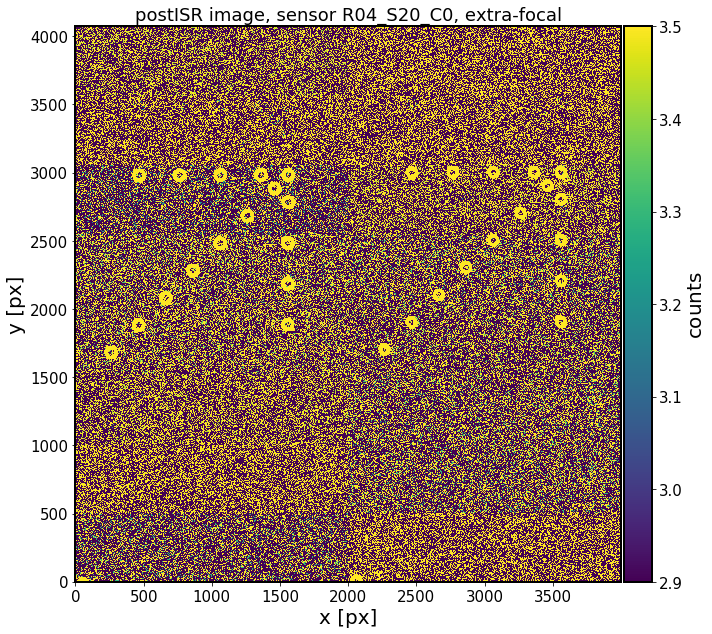

In [60]:
import imp
imp.reload(at)

centroid, centFlag = at.readCentroidInfo(data_dir, focalType=focalType, raft=raft,detector=detector)

postage, postFlag =  at.readPostageStars(data_dir)

at.plotImage(image,ax=None, log=False, sensor=sensor, focalType=focalType,
          postage=postage,postFlag=postFlag, centroid=centFlag, 
          starMarker='redCross',starMarkerArgs=None,
          centMarkerArgs = None,centMarker='redCross',plotArgs={'vmin':2.9, 'vmax':3.5})



Using postage images from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/postage
Searching in /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/postage directory

Available postage stamp images for sensor R04_S20_C0: 

Looking for files that start with "extra_singleSciImg" and contain "R04_S20_C0"...

Found 1 singleSciImg postage stamp images 
['extra_singleSciImg_sensor-R04_S20_C0_star-0_id-2_posX-0_posY-0.txt']

Looking for files that start with "extra_imgDeblend_full" and contain "R04_S20_C0"...

Found 1 imgDeblend_full postage stamp images 
['extra_imgDeblend_full_sensor-R04_S20_C0_star-0_id-2_posX-0_posY-0.txt']

Looking for files that start with "extra_imgDeblend_resized" and contain "R04_S20_C0"...

Found 1 imgDeblend_resized postage stamp images 
['extra_imgDeblend_resized_sensor-R04_S20_C0_star-0_id-2_posX-0_posY-0.txt']
Only found 1 
Loading extra_singleSciImg_sensor-R04_S20_C

../analysis_tools/analysisTools.py:412: UserWarning: loadtxt: Empty input file: "/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars/postage/extra_imgDeblend_resized_sensor-R04_S20_C0_star-0_id-2_posX-0_posY-0.txt"
  image = np.loadtxt(os.path.join(postage_dir,fname))


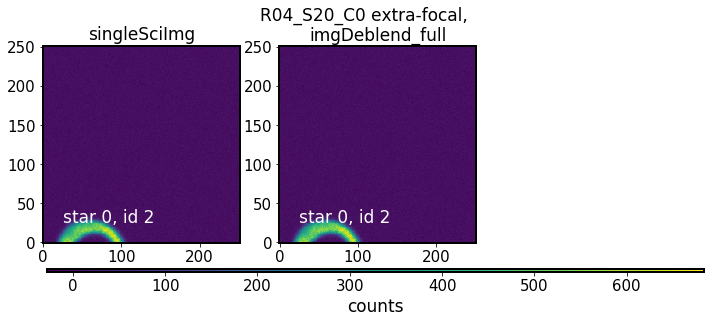

In [61]:
import imp
imp.reload(at)
at.plotPostageStamps(data_dir, sensor=sensor, focalType=focalType, Nstars=2)